Average no. of steps taken for the 1D case (over 5000 trials): 40.6936
Average no. of steps taken for the 2D case (over 5000 trials): 62.7044


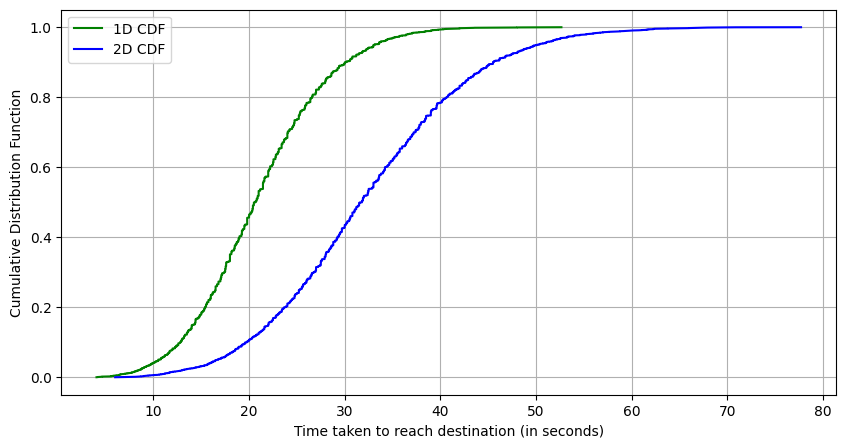

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
def case1d(d=100, v=20, trials=5000):
    times = []
    listofsteps = []
    for _ in range(trials):
        position = 0
        steps = 0
        while position < d:
            forward = random.randint(1, 10)
            backward = random.randint(1, 5)
            position += forward - backward
            steps += 1
        timetaken = (steps * (forward + backward)) / (v)
        times.append(timetaken)
        listofsteps.append(steps)
    return times, np.mean(listofsteps)
def case2d(d=100, v=20, trials=5000):
    times = []
    listofsteps = []
    for _ in range(trials):
        x, y = 0, 0
        steps = 0
        while np.sqrt(x**2 + y**2) < d:
            angle = random.uniform(0, np.pi)
            forward = random.randint(1, 10)
            backward = random.randint(1, 5)
            x += (forward - backward) * np.cos(angle)
            y += (forward - backward) * np.sin(angle)
            steps += 1
        timetaken = (steps * (forward + backward)) / (v)
        times.append(timetaken)
        listofsteps.append(steps)
    return times, np.mean(listofsteps)
def cdf(times_1d, times_2d):
    plt.figure(figsize=(10, 5))
    colors = {"1D": "green", "2D": "blue"}
    for times, label in zip([times_1d, times_2d], ["1D", "2D"]):
        sorted_times = np.sort(times)
        cdf = np.arange(1, len(sorted_times) + 1) / len(sorted_times)
        plt.plot(sorted_times, cdf, label=f"{label} CDF", color=colors[label])
    plt.xlabel("Time taken to reach destination (in seconds)")
    plt.ylabel("Cumulative Distribution Function")
    plt.legend()
    plt.grid()
    plt.show()
times_1d, avg_steps_1d = case1d()
times_2d, avg_steps_2d = case2d()
print(f"Average no. of steps taken for the 1D case (over 5000 trials): {avg_steps_1d}")
print(f"Average no. of steps taken for the 2D case (over 5000 trials): {avg_steps_2d}")
cdf(times_1d, times_2d)